###  UNIFOR - Mestrado em Inteligência Artificial e Ciência de Dados
### Discipplina: Análise de Dados em Grafos
#### Professor: Raimir
#### Equipe: Maurício Brito, João David e Tiago Pontes  
  
### Problema do Caixeiro Viajante (TSP)
Suponha um vendedor de produtos que atua em várias cidades, algumas das quais são conectadas por estradas. O trabalho do vendedor  
exige que ele visite cada uma das cidades.  
- É possível para ele planejar uma viagem de carro, partindo e voltando a uma mesma cidade, visitando cada uma das cidades exatamente uma vez?
- Se tal viagem for possível, é viável planejá-la de maneira a minimizar a distância total percorrida?  

As perguntas propostas são:
- O grafo G é um grafo Hamiltoniano ?
- Se for, é possível construir um ciclo hamiltoniano de peso (comprimento) mínimo ?

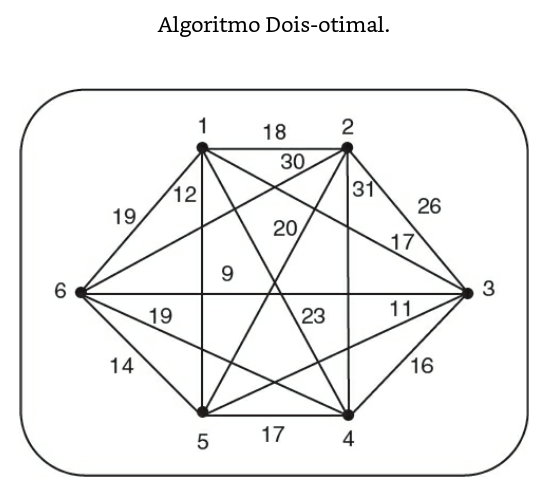

### Importa Bibliotecas Necessárias

In [1]:
import networkx as nx
from networkx.algorithms.tournament import hamiltonian_path
import numpy as np

#### GERA UM GRAFO COMPLETO
Um grafo completo é um grafo simples em que todo vértice é adjacente a todos os outros vértices. O grafo completo de n vértices é frequentemente denotado por Kn
Um grafo Kn possui o número máximo possível de arestas para um dados n. Ele é, também regular-(n-1) pois todos os seus vértices tem grau n-1.

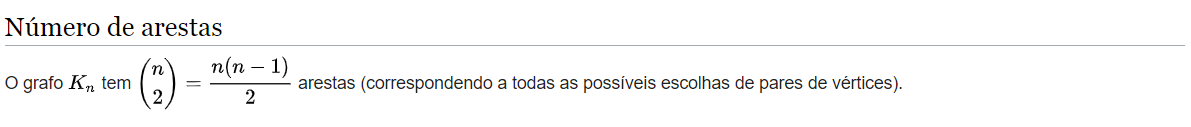

In [2]:
# # Gera um gravo completo com n vértices (vértice iniciando do 1)
# def gera_G_completo(n):
#     G = nx.Graph()
#     for i in range(1,n+1):
#         G.add_node(i, color='k')
#         for j in range(i+1, n+1):
#             G.add_edge(i, j)
#     return G

In [3]:
# Gera um gravo completo com n vértices(vértice iniciando do 0)
def gera_G_completo(n):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
        for j in range(i+1, n):
            G.add_edge(i, j, color='black')
    return G

#### Apresenta o caminho no grafo

In [4]:
# Apresenta o caminho no grafo
def mostrar_caminho(G, caminho):
    edge_labels = nx.get_edge_attributes(G, 'weight')
    colors = nx.get_edge_attributes(G,'color')
    e2 = 1
    for e1 in range(len(caminho)-1):
        G.add_edge(caminho[e1], caminho[e2], color="red", width = 3)
        e2 += 1

    colors = nx.get_edge_attributes(G,'color').values()
    pos=nx.circular_layout(G)

    nx.draw(G, pos, with_labels=True, font_weight='bold', font_color="w", node_color='b', edge_color=colors)
    # Draw edge labels according to node positions
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

#### Calcula a soma dos pesos das arestas no caminho indicado

In [5]:
# Calcula a soma dos pesos das arestas no caminho indicado
def cost(custo_mat, caminho):
    return custo_mat[np.roll(caminho, 1), caminho].sum()

#### Encontra o Menor Ciclo Otimal

In [6]:
# Encontra um menor caminho hamiltoniano
def dois_otimal(caminho):
    melhor = caminho
    custo_melhor = cost(custo_mat, melhor)
    melhorou = True
    contador = 0

    while melhorou:
        melhorou = False
        for i in range(1, len(caminho)-2):
            for j in range(i+1, len(caminho)):
                contador += 1
                if j-i == 1: continue # permanece
                novo_caminho = caminho[:]
                novo_caminho[i:j] = caminho[j-1:i-1:-1] # faz a troca (2-optimal)
                if cost(custo_mat, novo_caminho) < cost(custo_mat, melhor):  # Verifica menores pesos/custo/distância
                        melhor = novo_caminho
                        custo_melhor = cost(custo_mat, melhor)
                        melhorou = True
        caminho = melhor
    print("Iterações:", contador)
    return melhor, custo_melhor

#### Adiciona os Pesos de Cada Aresta

In [7]:
# Inclui os pesos de cada aresta a partir de uma matriz
def inclui_pesos_from_matriz(G, matriz):
    for e in G.edges():
        peso = matriz[e[0]][e[1]]
        G[e[0]][e[1]]['weight'] = peso
    
    # Obtém atributos das arestas
    edge_labels = nx.get_edge_attributes(G, 'weight')
    pos=nx.circular_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold', font_color="w", node_color='b')
    # Draw edge labels according to node positions
    nx.draw_networkx_edge_labels(G, pos, edge_labels)

In [8]:
# # Inclui os pesos de cada aresta a partir do INPUT do usuário
# def inclui_pesos_arestas(G):
#     matriz = np.zeros((len(G),len(G)), dtype=int)
#     for e in G.edges():
#         print(f'Qual o peso da aresta {e}?')
#         peso = input()
#         G[e[0]][e[1]]['weight'] = peso
#         matriz[e[0]][e[1]] = matriz[e[1]][e[0]] = peso
    
#     # Obtém atributos das arestas
#     edge_labels = nx.get_edge_attributes(G, 'weight')
#     pos=nx.circular_layout(G)
#     # Create edge labels
#     # labels = {e: str(e) for e in G.edges}
#     nx.draw(G, pos, with_labels=True, font_weight='bold', font_color="w", node_color='b')
#     # Draw edge labels according to node positions
#     nx.draw_networkx_edge_labels(G, pos, edge_labels)
#     return matriz
# custo_mat = inclui_pesos_arestas(G)

#### Implementa o Teorema de Dirac, 1952
Seja G = (V,E) um grafo simples com n vértices, n ≥ 3. Se para todo vértice v ∈ V, d(v) ≥ n/2, então G é hamiltoniano.

In [9]:
# Checa se o grafo tem mais de 3 vértics e se todos os vértices tem grau >= n/2
def checa_graus(G):
    condicao = []
    n = len(list(G.degree()))
    if n < 3:
        condicao.append(False)
    for v in G.degree():
        # checa se cada vértice tem grau >= n/2
        condicao.append(True if v[1] >= n/2 else False)
    if False in condicao:
        print("NÃO podemos afirmar que é Hamiltoniano.")
    else:
        print("O grafo É Hamiltoniano.")
    print(condicao)

### Encontra Ciclo Otimal em Grafo k6

O grafo É Hamiltoniano.
[True, True, True, True, True, True]
Iterações: 28
Melhor Caminho: [0, 1, 4, 3, 2, 5, 0] - Distância:99


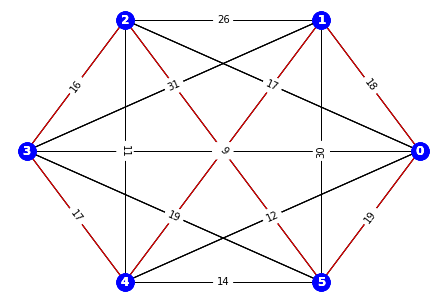

In [10]:
# Cria um grafo k6
k6 = gera_G_completo(6)
nx.draw(k6, pos=nx.circular_layout(k6), with_labels=True, font_weight='bold', font_color="w", node_color='b')

custo_mat = np.array([
    [0, 18, 17, 23, 12, 19],
    [18, 0, 26, 31, 20, 30],
    [17, 26, 0, 16, 11, 9],
    [23, 31, 16, 0, 17, 19],
    [12, 20, 11, 17, 0, 14],
    [19, 30, 9, 19, 14, 0],
])

# Inclui pesos nas arestas do grafo a partir de uma matriz
inclui_pesos_from_matriz(k6, custo_mat)

# Conferir se o grafo é hamiltoniano
checa_graus(k6)

# Executar algoritmo Dois Otimal
melhor_caminho, distancia = dois_otimal([0,1,2,3,4,5,0])
print(f'Melhor Caminho: {melhor_caminho} - Distância:{distancia}')

# Apresenta o grafo com o ciclo otimal
mostrar_caminho(k6, melhor_caminho)

### Encontra Ciclo Otimal em Grafo k5

O grafo É Hamiltoniano.
[True, True, True, True, True]
Iterações: 18
Melhor Caminho: [0, 1, 4, 3, 2, 0] - Distância:42


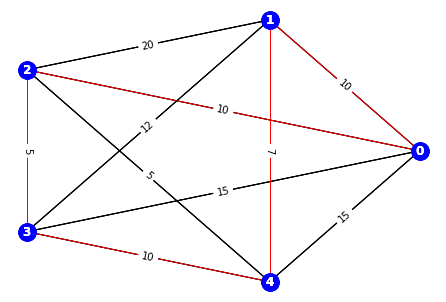

In [11]:
# Cria um grafo k5
k5 = gera_G_completo(5)
nx.draw(k5, pos=nx.circular_layout(k5), with_labels=True, font_weight='bold', font_color="w", node_color='b')

# Inclui pesos nas arestas do grafo a partir de uma matriz
custo_mat = np.array([
    [0, 10, 10, 15, 15],
    [10, 0, 20, 12, 7],
    [10, 20, 0, 5, 5],
    [15, 12, 5, 0, 10],
    [15, 7, 5, 10, 0],
])
inclui_pesos_from_matriz(k5, custo_mat)

# Conferir se o grafo é hamiltoniano
checa_graus(k5)

# Executar algoritmo Dois Otimal
melhor_caminho, distancia = dois_otimal([0,1,2,3,4,0])
print(f'Melhor Caminho: {melhor_caminho} - Distância:{distancia}')

# Apresenta o grafo com o ciclo otimal
mostrar_caminho(k5, melhor_caminho)

### Encontra Ciclo Otimal em Grafo k4

O grafo É Hamiltoniano.
[True, True, True, True]
Iterações: 5
Melhor Caminho: [0, 1, 2, 3, 0] - Distância:14


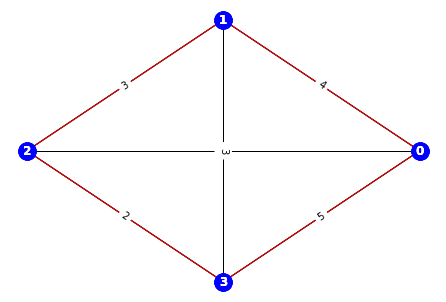

In [12]:
# Cria um grafo k4
k4 = gera_G_completo(4)
nx.draw(k4, pos=nx.circular_layout(k4), with_labels=True, font_weight='bold', font_color="w", node_color='b')

# Inclui pesos nas arestas do grafo a partir de uma matriz
custo_mat = np.array([
    [0, 4, 6, 5],
    [6, 0, 3, 3],
    [6, 3, 0, 2],
    [5, 3, 2, 0],
])
inclui_pesos_from_matriz(k4, custo_mat)

# Conferir se o grafo é hamiltoniano
checa_graus(k4)

# Executar algoritmo Dois Otimal
melhor_caminho, distancia = dois_otimal([0,1,2,3,0])
print(f'Melhor Caminho: {melhor_caminho} - Distância:{distancia}')

# Apresenta o grafo com o ciclo otimal
mostrar_caminho(k4, melhor_caminho)